In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### MATH 189 Final Project

#### Import the Data

In [2]:
pl_2018 = pd.read_csv('data/PL_2018_2019.csv')
pl_2019 = pd.read_csv('data/PL_2019_2020.csv')
pl_2023 = pd.read_csv('data/PL_2023_2024.csv')

#### Column Keys

#### Exploratory Data Analysis

In [3]:
pl_2018.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [4]:
pl_2019.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [5]:
pl_2023.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88


General Dataset Cleanup

In [6]:
# the columns related to betting data - look at notes.txt for more info
columns_to_keep = [
    'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam',
    'FTHG', 'HG', 'FTAG', 'AG', 'FTR', 'Res',
    'HTHG', 'HTAG', 'HTR',
    'Attendance', 'Referee',
    'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
    'HC', 'AC', 'HF', 'AF', 'HFKC', 'AFKC',
    'HO', 'AO', 'HY', 'AY', 'HR', 'AR',
    'HBP', 'ABP'
]

pl_2018 = pl_2018[[col for col in columns_to_keep if col in pl_2018.columns]]
pl_2019 = pl_2019[[col for col in columns_to_keep if col in pl_2019.columns]]
pl_2023 = pl_2023[[col for col in columns_to_keep if col in pl_2023.columns]]

rename_columns = {
    'Div': 'LeagueDivision',
    'Date': 'MatchDate',
    'Time': 'KickoffTime',
    'HomeTeam': 'HomeTeam',
    'AwayTeam': 'AwayTeam',
    'FTHG': 'FullTimeHomeGoals',
    'FTAG': 'FullTimeAwayGoals',
    'FTR': 'FullTimeResult',
    'HTHG': 'HalfTimeHomeGoals',
    'HTAG': 'HalfTimeAwayGoals',
    'HTR': 'HalfTimeResult',
    'Attendance': 'Attendance',
    'Referee': 'Referee',
    'HS': 'HomeShots',
    'AS': 'AwayShots',
    'HST': 'HomeShotsOnTarget',
    'AST': 'AwayShotsOnTarget',
    'HHW': 'HomeHitWoodwork',
    'AHW': 'AwayHitWoodwork',
    'HC': 'HomeCorners',
    'AC': 'AwayCorners',
    'HF': 'HomeFouls',
    'AF': 'AwayFouls',
    'HFKC': 'HomeFreeKicksConceded',
    'AFKC': 'AwayFreeKicksConceded',
    'HO': 'HomeOffsides',
    'AO': 'AwayOffsides',
    'HY': 'HomeYellowCards',
    'AY': 'AwayYellowCards',
    'HR': 'HomeRedCards',
    'AR': 'AwayRedCards',
    'HBP': 'HomeBookingPoints',
    'ABP': 'AwayBookingPoints'
}

pl_2018.rename(columns=rename_columns, inplace=True)
pl_2019.rename(columns=rename_columns, inplace=True)
pl_2023.rename(columns=rename_columns, inplace=True)

Find any missing values

In [7]:
print(f'Null values in pl_2018 dataset: {pl_2018.isna().sum().sum()}')
print(f'Null values in pl_2019 dataset: {pl_2019.isna().sum().sum()}')
print(f'Null values in pl_2023 dataset: {pl_2023.isna().sum().sum()}')

Null values in pl_2018 dataset: 0
Null values in pl_2019 dataset: 0
Null values in pl_2023 dataset: 0


Convert the corresponding variables to categorical

In [8]:
categorical_cols = [
    'LeagueDivision',
    'HomeTeam',
    'AwayTeam',
    'FullTimeResult',
    'HalfTimeResult',
    'Referee'
]

for col in categorical_cols:
    if col in pl_2018.columns:
        pl_2018[col] = pl_2018[col].astype('category')
    if col in pl_2019.columns:
        pl_2019[col] = pl_2019[col].astype('category')
    if col in pl_2023.columns:
        pl_2023[col] = pl_2023[col].astype('category')

Dataset Description

In [9]:
pl_2018.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,5.705263,4.552632,10.152632,10.305263,1.526316,1.684211,0.047368,0.076316
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,2.971718,2.730627,3.293532,3.503707,1.222844,1.209140,0.212706,0.275599
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,4.000000,2.750000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,5.000000,4.000000,10.000000,10.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,8.000000,6.000000,12.000000,13.000000,2.000000,2.000000,0.000000,0.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,16.000000,14.000000,23.000000,21.000000,6.000000,5.000000,1.000000,2.000000


In [10]:
pl_2019.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.515789,1.205263,0.700000,0.550000,13.323684,11.400000,4.555263,3.994737,5.773684,4.931579,10.484211,10.981579,1.586842,1.765789,0.057895,0.060526
std,1.248646,1.200252,0.886427,0.758505,5.417938,5.255278,2.520543,2.489020,3.217095,2.835052,3.582759,3.713653,1.241471,1.217891,0.244875,0.238774
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,3.000000,3.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,5.000000,5.000000,10.000000,11.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,8.000000,7.000000,13.000000,13.000000,2.000000,3.000000,0.000000,0.000000
max,8.000000,9.000000,5.000000,5.000000,31.000000,26.000000,13.000000,15.000000,17.000000,16.000000,23.000000,24.000000,6.000000,6.000000,2.000000,1.000000


In [11]:
pl_2023.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.800000,1.478947,0.734211,0.626316,15.402632,12.181579,5.436842,4.431579,6.123684,4.713158,10.744737,11.347368,1.910526,2.263158,0.068421,0.081579
std,1.365616,1.277811,0.831687,0.823367,6.261959,5.467696,2.885449,2.526493,3.221460,2.906518,3.457331,3.674826,1.392553,1.389448,0.263030,0.283546
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,11.000000,8.000000,3.000000,3.000000,4.000000,3.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.000000,15.000000,11.000000,5.000000,4.000000,6.000000,4.000000,11.000000,11.000000,2.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,1.000000,19.000000,15.000000,7.000000,6.000000,8.000000,6.000000,13.000000,14.000000,3.000000,3.000000,0.000000,0.000000
max,6.000000,8.000000,4.000000,5.000000,36.000000,30.000000,15.000000,15.000000,17.000000,15.000000,20.000000,22.000000,6.000000,7.000000,2.000000,2.000000


Referee EDA

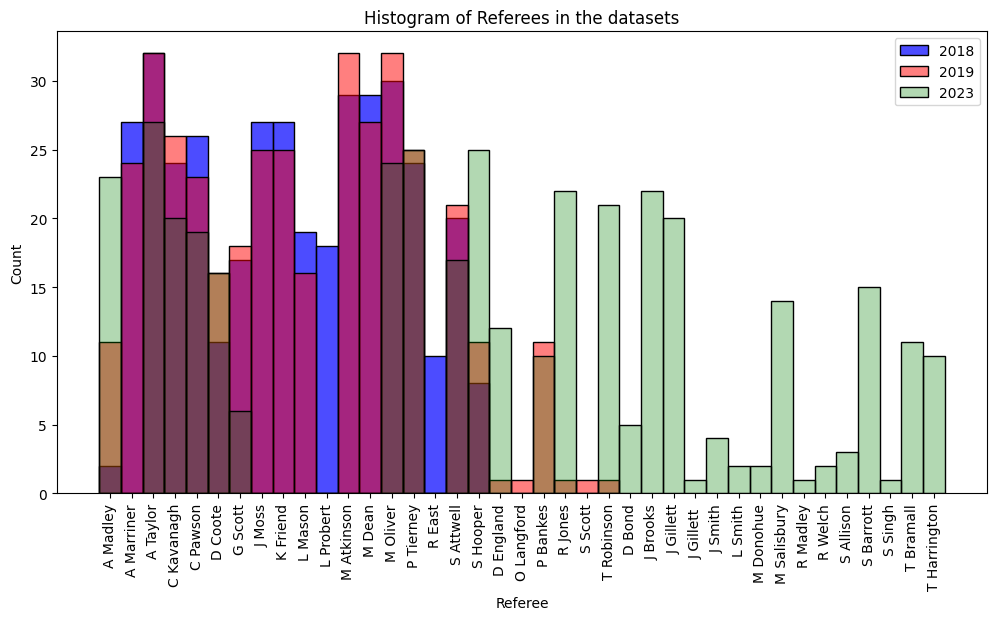

Referee with the most matches in 2018 dataset: A Taylor
Referee with the most matches in 2019 dataset: M Atkinson
Referee with the most matches in 2023 dataset: A Taylor


In [12]:
# plot the histogram of all the refrees in the datasets
plt.figure(figsize=(12, 6))
sns.histplot(pl_2018['Referee'], kde=False, color='blue', alpha=0.7)
sns.histplot(pl_2019['Referee'], kde=False, color='red', alpha=0.5)
sns.histplot(pl_2023['Referee'], kde=False, color='green', alpha=0.3)
plt.xticks(rotation=90)
plt.legend(['2018', '2019', '2023'])
plt.title('Histogram of Referees in the datasets')
plt.show()

# refree with the most matches in the datasets
most_matches_2018 = pl_2018['Referee'].value_counts().idxmax()
most_matches_2019 = pl_2019['Referee'].value_counts().idxmax()
most_matches_2023 = pl_2023['Referee'].value_counts().idxmax()

print(f'Referee with the most matches in 2018 dataset: {most_matches_2018}')
print(f'Referee with the most matches in 2019 dataset: {most_matches_2019}')
print(f'Referee with the most matches in 2023 dataset: {most_matches_2023}')


Match Results EDA

In [13]:
pl_2018[["FullTimeResult"]].value_counts()/len(pl_2018)

FullTimeResult
H                 0.476316
A                 0.336842
D                 0.186842
Name: count, dtype: float64

Text(0.5, 1.0, 'Histogram of Full Time Results in the datasets')

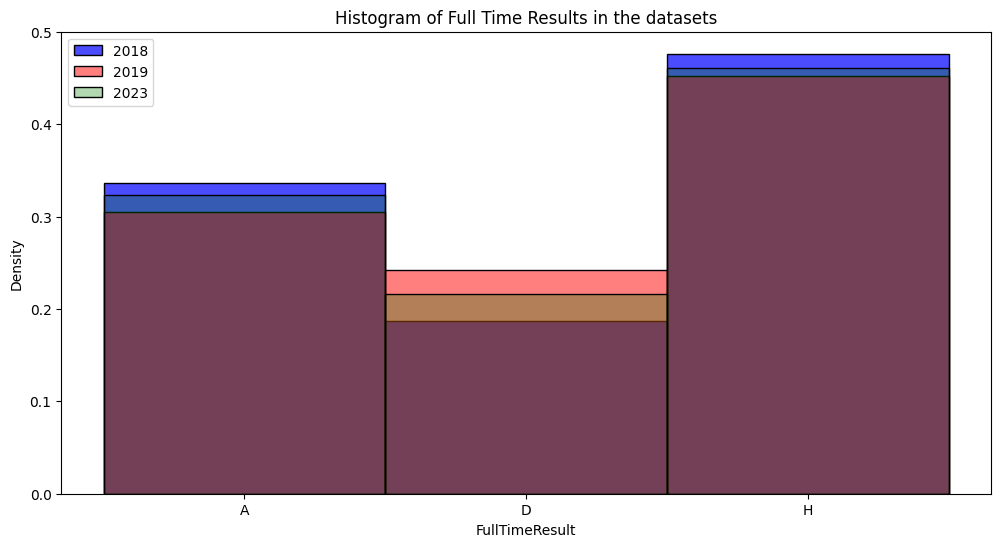

In [14]:
# plot the histogram of full time results in the datasets
plt.figure(figsize=(12, 6))
sns.histplot(pl_2018["FullTimeResult"], kde=False, color='blue', alpha=0.7, stat="density")
sns.histplot(pl_2019["FullTimeResult"], kde=False, color='red', alpha=0.5, stat="density")
sns.histplot(pl_2023["FullTimeResult"], kde=False, color='green', alpha=0.3, stat="density")
plt.legend(['2018', '2019', '2023'])
plt.title('Histogram of Full Time Results in the datasets')


Home and Away Fouls EDA

/var/folders/pn/2dg49b3d1bv5nvhgytbsqc7h0000gn/T/ipykernel_15989/3704345294.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='HomeFouls', data=combined_df, palette=['blue', 'red', 'green'])


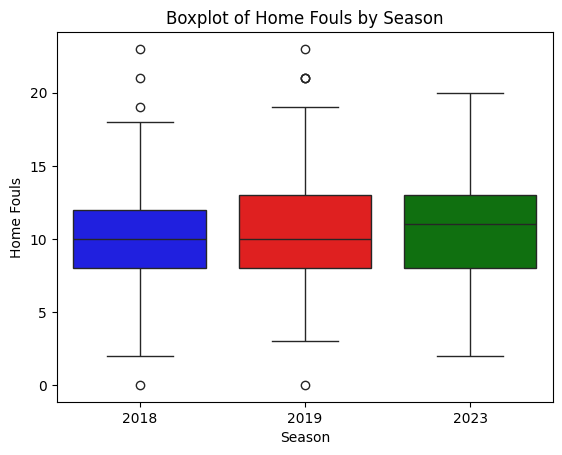

/var/folders/pn/2dg49b3d1bv5nvhgytbsqc7h0000gn/T/ipykernel_15989/3704345294.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='AwayFouls', data=combined_df, palette=['blue', 'red', 'green'])


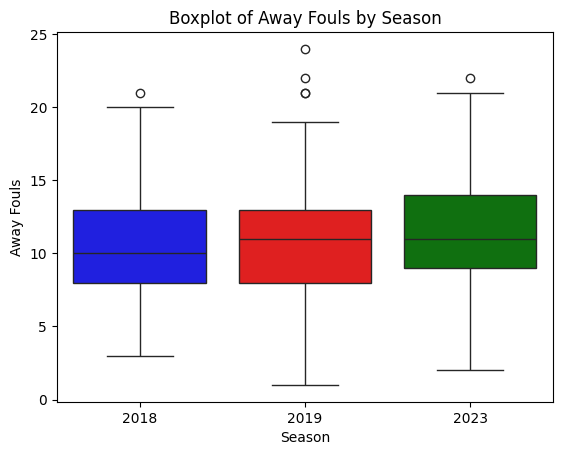

In [15]:
pl_2018['Season'] = '2018'
pl_2019['Season'] = '2019'
pl_2023['Season'] = '2023'

combined_df = pd.concat([pl_2018, pl_2019, pl_2023])

sns.boxplot(x='Season', y='HomeFouls', data=combined_df, palette=['blue', 'red', 'green'])

plt.title('Boxplot of Home Fouls by Season')
plt.xlabel('Season')
plt.ylabel('Home Fouls')
plt.show()

sns.boxplot(x='Season', y='AwayFouls', data=combined_df, palette=['blue', 'red', 'green'])
plt.title('Boxplot of Away Fouls by Season')
plt.xlabel('Season')
plt.ylabel('Away Fouls')
plt.show()


In [16]:
combined_df.columns

Index(['LeagueDivision', 'MatchDate', 'HomeTeam', 'AwayTeam',
       'FullTimeHomeGoals', 'FullTimeAwayGoals', 'FullTimeResult',
       'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult', 'Referee',
       'HomeShots', 'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget',
       'HomeCorners', 'AwayCorners', 'HomeFouls', 'AwayFouls',
       'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards', 'AwayRedCards',
       'Season', 'KickoffTime'],
      dtype='object')

Bookings EDA

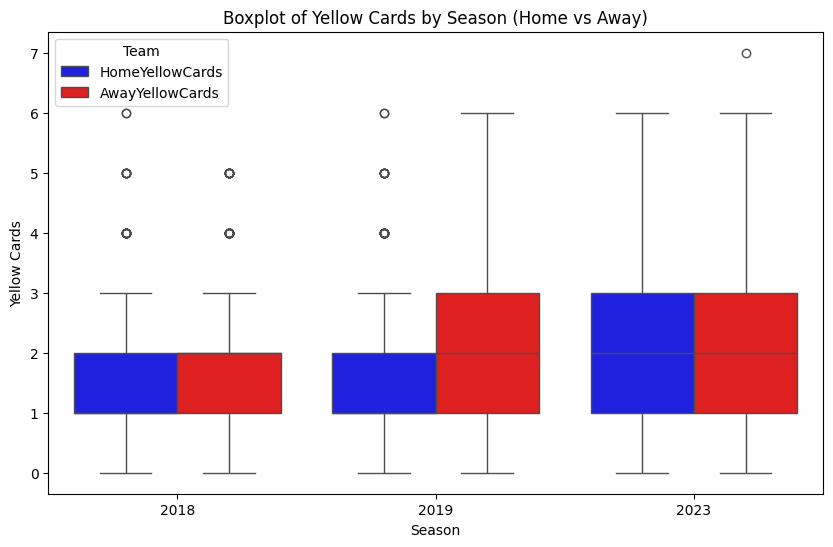

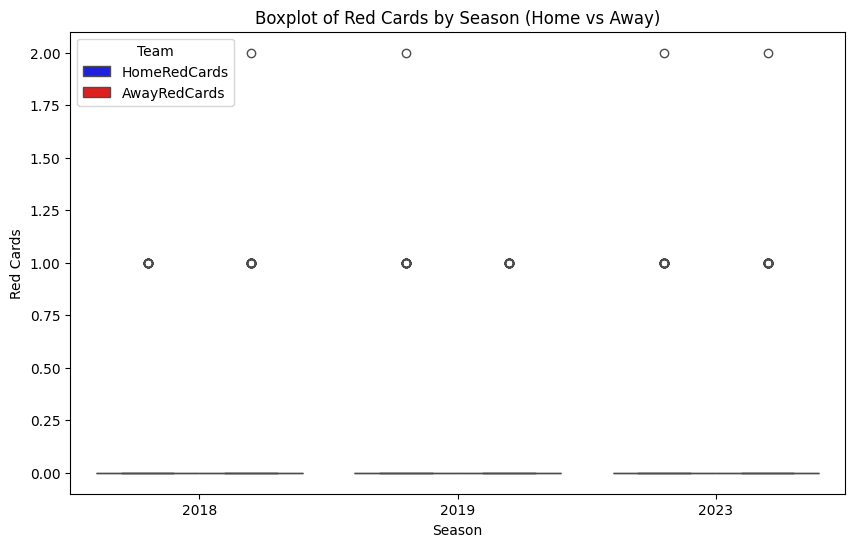

In [17]:
yellow_cards_df = combined_df.melt(
    id_vars=['Season'],
    value_vars=['HomeYellowCards', 'AwayYellowCards'],
    var_name='TeamType',
    value_name='YellowCards'
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Season',
    y='YellowCards',
    hue='TeamType',
    data=yellow_cards_df,
    palette={'HomeYellowCards': 'blue', 'AwayYellowCards': 'red'}
)

plt.title('Boxplot of Yellow Cards by Season (Home vs Away)')
plt.xlabel('Season')
plt.ylabel('Yellow Cards')
plt.legend(title='Team')
plt.show()

red_cards_df = combined_df.melt(
    id_vars=['Season'],
    value_vars=['HomeRedCards', 'AwayRedCards'],
    var_name='TeamType',
    value_name='RedCards'
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Season',
    y='RedCards',
    hue='TeamType',
    data=red_cards_df,
    palette={'HomeRedCards': 'blue', 'AwayRedCards': 'red'}
)

plt.title('Boxplot of Red Cards by Season (Home vs Away)')
plt.xlabel('Season')
plt.ylabel('Red Cards')
plt.legend(title='Team')
plt.show()

In [18]:
combined_df = combined_df.drop(columns={"LeagueDivision"})
combined_df

,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,Referee,...,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Season,KickoffTime
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,2,5,11,8,2,1,0,0,2018,NaN
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,7,4,11,9,1,1,0,0,2018,NaN
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,5,5,9,11,1,2,0,0,2018,NaN
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,2,5,9,8,2,1,0,0,2018,NaN
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,3,5,11,12,2,2,0,0,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/2024,Crystal Palace,Aston Villa,5,0,H,2,0,H,D Bond,...,2,4,10,8,1,4,0,0,2023,16:00
376,19/05/2024,Liverpool,Wolves,2,0,H,2,0,H,C Kavanagh,...,10,2,14,11,1,1,0,1,2023,16:00
377,19/05/2024,Luton,Fulham,2,4,A,1,2,A,M Donohue,...,4,4,15,20,5,4,0,0,2023,16:00
378,19/05/2024,Man City,West Ham,3,1,H,2,1,H,J Brooks,...,11,2,3,12,0,1,0,0,2023,16:00


In [19]:
combined_df.columns

Index(['MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'Referee', 'HomeShots',
       'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners',
       'AwayCorners', 'HomeFouls', 'AwayFouls', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards', 'Season',
       'KickoffTime'],
      dtype='object')

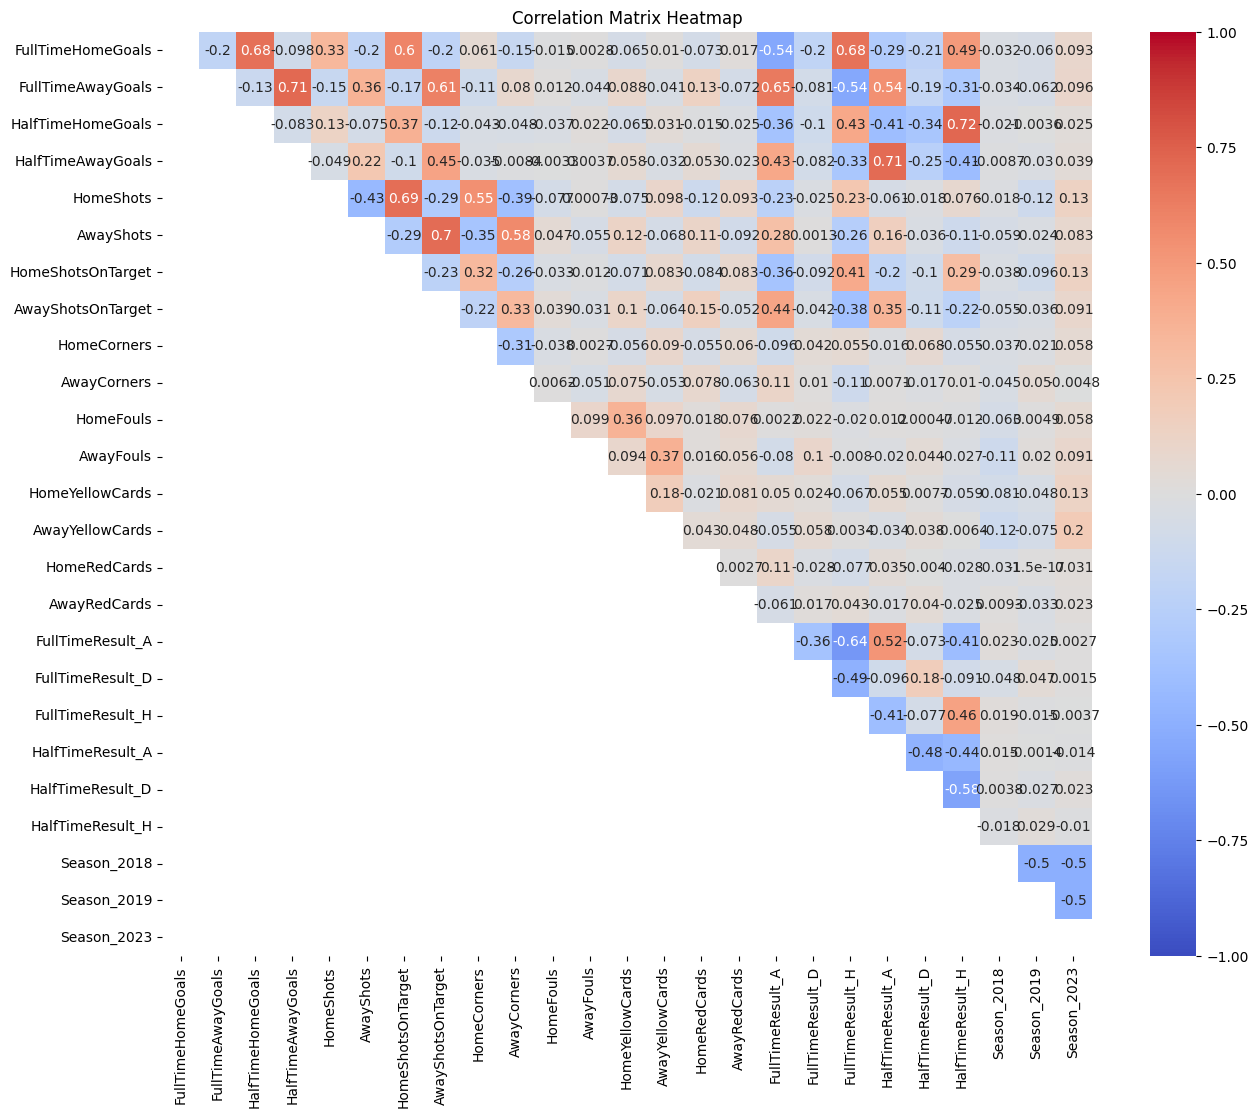

In [20]:
#make mathcdate = is_weekend ; not_is_weekend
#make referee = ???
df = pd.get_dummies(combined_df, columns=['FullTimeResult', 'HalfTimeResult', 'Season'], drop_first=False)
df = df.drop(columns={"MatchDate", "Referee", 'KickoffTime','HomeTeam', 'AwayTeam'})
corr = df.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

# Create a heatmap with annotations and a diverging color palette
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title (optional)
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

In [ ]:
#try 

In [21]:
#time vs fouls - aniket
#is_weekend / not_is_weekend vs fouls - aniket
#home_team_result vs. home_team_corners - varun
#home_team_result vs away_team_fouls - varun
#home_team_win - varun

#PCA to find the key features - find the most relevant feature - varun
#the features that support the home team - are those differences/observed values significant
#do before-after VAR stuff

#pick an appropriate feature and make a test statistic - either just linear regression/PCR/log regression

/var/folders/pn/2dg49b3d1bv5nvhgytbsqc7h0000gn/T/ipykernel_15989/1915657453.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_win['KickoffHour'] = pd.to_datetime(time_win['KickoffTime']).dt.hour


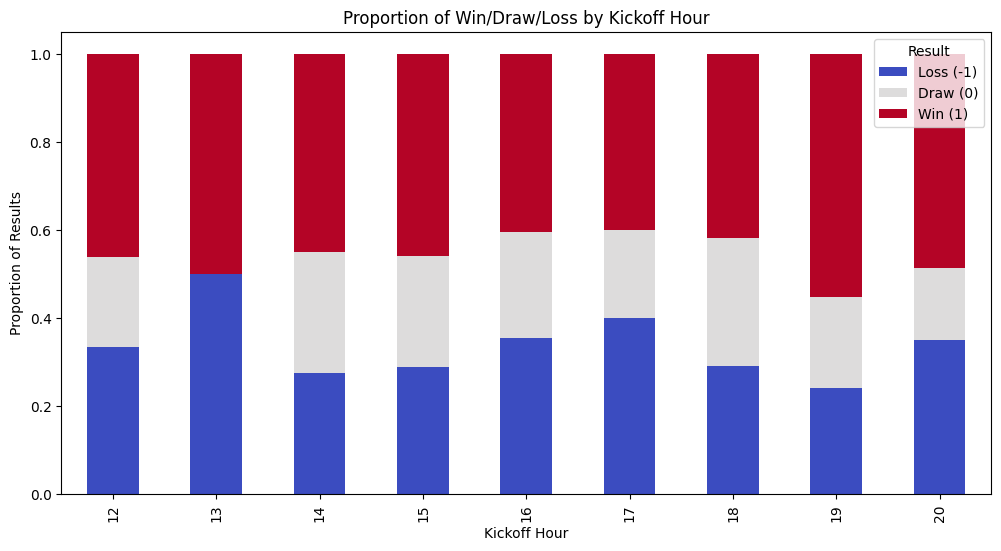

In [22]:
time_win = combined_df[['KickoffTime', 'FullTimeResult', 'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards']]
time_win = time_win.dropna()
# Group by hour and calculate outcome percentages
time_win['KickoffHour'] = pd.to_datetime(time_win['KickoffTime']).dt.hour
hourly_results = time_win.groupby('KickoffHour')['FullTimeResult'].value_counts(normalize=True).unstack().fillna(0)

# Plot
hourly_results.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Kickoff Hour')
plt.ylabel('Proportion of Results')
plt.title('Proportion of Win/Draw/Loss by Kickoff Hour')
plt.legend(title='Result', labels=['Loss (-1)', 'Draw (0)', 'Win (1)'])
plt.show()

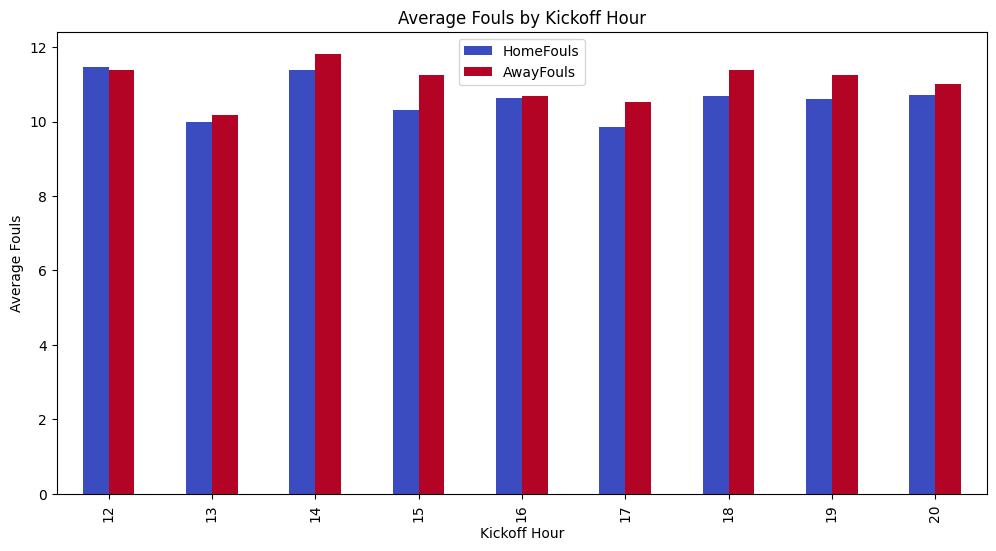

In [23]:
# plot the fouls by hour
hourly_fouls = time_win.groupby('KickoffHour')[['HomeFouls', 'AwayFouls']].mean()
hourly_fouls.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Kickoff Hour')
plt.ylabel('Average Fouls')
plt.title('Average Fouls by Kickoff Hour')
plt.show()

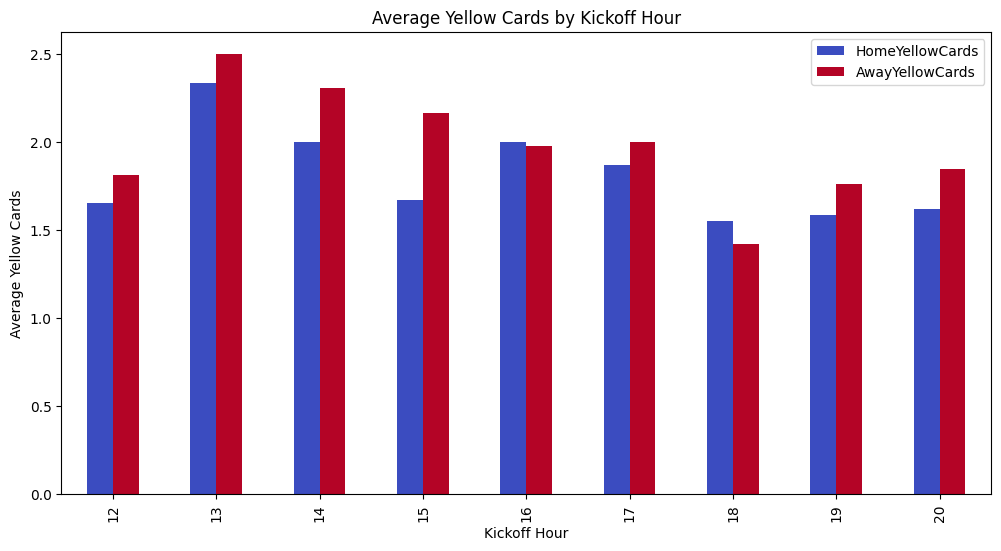

In [24]:
# plot the yellow cards by hour
hourly_yellow_cards = time_win.groupby('KickoffHour')[['HomeYellowCards', 'AwayYellowCards']].mean()
hourly_yellow_cards.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Kickoff Hour')
plt.ylabel('Average Yellow Cards')
plt.title('Average Yellow Cards by Kickoff Hour')
plt.show()

In [25]:
weekend_win = combined_df[['MatchDate', 'FullTimeResult', 'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards']]
weekend_win = weekend_win.dropna()
# Group by is weekend and calculate outcome percentages
weekend_win['IsWeekend'] = pd.to_datetime(weekend_win['MatchDate']).dt.dayofweek.isin([5, 6])

weekend_results = weekend_win.groupby('IsWeekend')['FullTimeResult'].value_counts(normalize=True).unstack().fillna(0)

# Plot
weekend_results.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Is Weekend')
plt.ylabel('Proportion of Results')
plt.title('Proportion of Win/Draw/Loss by Weekend')
plt.legend(title='Result', labels=['Loss (-1)', 'Draw (0)', 'Win (1)'])
plt.show()


ValueError: time data "18/08/2018" doesn't match format "%m/%d/%Y", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [27]:
# plot the fouls by weekend
weekend_fouls = weekend_win.groupby('IsWeekend').mean().drop(columns=['HomeYellowCards', 'AwayYellowCards'])
weekend_fouls.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Is Weekend')
plt.ylabel('Average Fouls')
plt.title('Average Fouls by Weekend')
plt.show()

KeyError: 'IsWeekend'

In [28]:
# plot the fouls by weekend
weekend_fouls = weekend_win.groupby('IsWeekend').mean().drop(columns=['HomeFouls', 'AwayFouls'])
weekend_fouls.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Is Weekend')
plt.ylabel('Average Fouls')
plt.title('Average Yellow Cards by Weekend')
plt.show()

KeyError: 'IsWeekend'

In [29]:
#home_team_wins

combined_df.groupby("FullTimeResult", observed=True).count()

,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,Referee,HomeShots,...,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Season,KickoffTime
FullTimeResult,,,,,,,,,,,,,,,,,,,,,
A,367,367,367,367,367,367,367,367,367,367,...,367,367,367,367,367,367,367,367,367,239
D,245,245,245,245,245,245,245,245,245,245,...,245,245,245,245,245,245,245,245,245,174
H,528,528,528,528,528,528,528,528,528,528,...,528,528,528,528,528,528,528,528,528,347


In [30]:
combined_df["HomeCorners"].unique()

array([ 2,  7,  5,  3,  8,  1,  6, 10,  4,  9, 12, 11, 14, 13,  0, 16, 17,
       15])

FullTimeResult         A         D         H
HomeCorners                                 
0               0.466667  0.133333  0.400000
1               0.423729  0.220339  0.355932
2               0.450000  0.212500  0.337500
3               0.305785  0.256198  0.438017
4               0.318471  0.203822  0.477707
5               0.402985  0.156716  0.440299
6               0.244444  0.200000  0.555556
7               0.243243  0.252252  0.504505
8               0.333333  0.190476  0.476190
9               0.328125  0.171875  0.500000
10              0.382353  0.161765  0.455882
11              0.193548  0.290323  0.516129
12              0.156250  0.375000  0.468750
13              0.181818  0.363636  0.454545
14              0.142857  0.571429  0.285714
15              0.000000  0.333333  0.666667
16              0.250000  0.250000  0.500000
17              0.333333  0.333333  0.333333


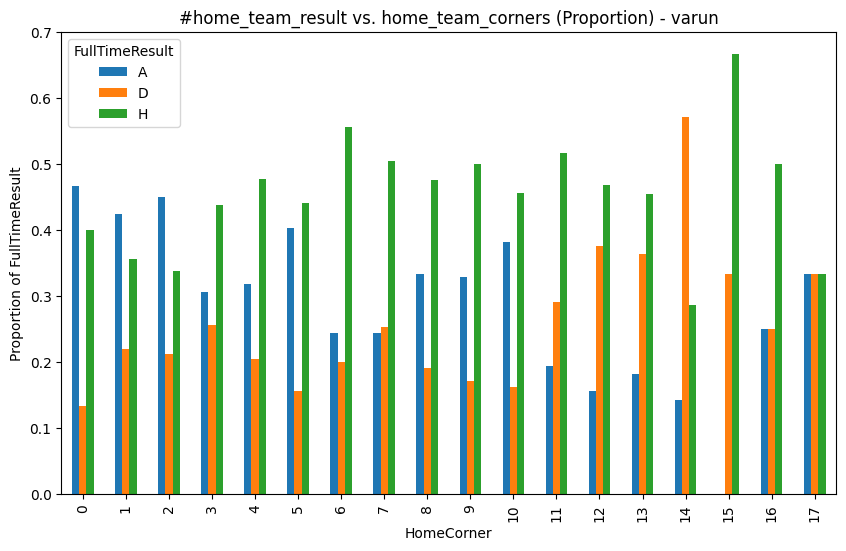

In [31]:
# Group by HomeCorner and count each FullTimeResult value
pivot = combined_df.groupby("HomeCorners")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions by dividing each row by its sum
prop = pivot.div(pivot.sum(axis=1), axis=0)

# Display the resulting proportions
print(prop)

# Optional: visualize the proportions with a stacked bar chart
prop.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. home_team_corners (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()


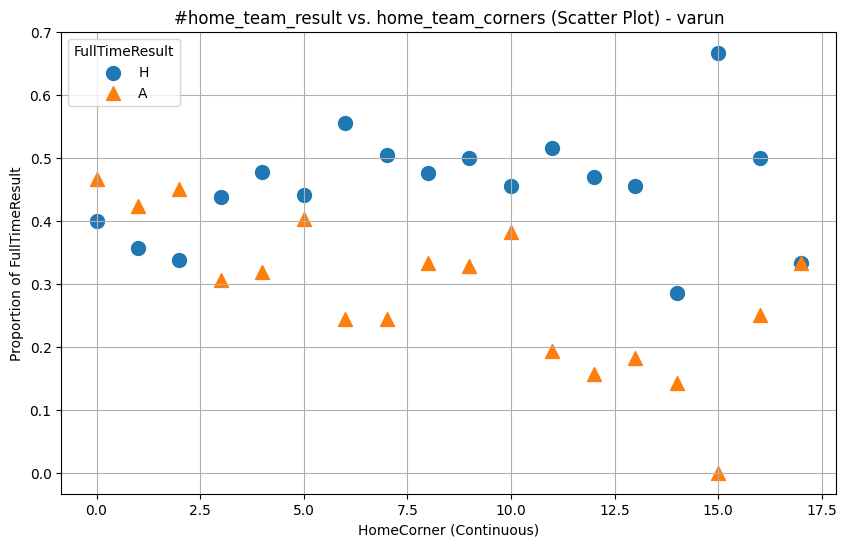

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pivot table: counts for each FullTimeResult grouped by HomeCorner
pivot = combined_df.groupby("HomeCorners")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions (each row sums to 1)
prop = pivot.div(pivot.sum(axis=1), axis=0)

# If needed, ensure the HomeCorner index is numeric
prop.index = pd.to_numeric(prop.index, errors='coerce')

# Create a scatter plot for each result category
plt.figure(figsize=(10, 6))
plt.scatter(prop.index, prop['H'], label='H', s=100, marker='o')
#plt.scatter(prop.index, prop['D'], label='D', s=100, marker='s')
plt.scatter(prop.index, prop['A'], label='A', s=100, marker='^')

plt.title('#home_team_result vs. home_team_corners (Scatter Plot) - varun')
plt.xlabel('HomeCorner (Continuous)')
plt.ylabel('Proportion of FullTimeResult')
plt.legend(title="FullTimeResult")
plt.grid(True)
plt.show()


FullTimeResult   A   D   H
HomeCorners               
0                7   2   6
1               25  13  21
2               36  17  27
3               37  31  53
4               50  32  75
5               54  21  59
6               33  27  75
7               27  28  56
8               35  20  50
9               21  11  32
10              26  11  31
11               6   9  16
12               5  12  15
13               2   4   5
14               1   4   2
15               0   1   2
16               1   1   2
17               1   1   1


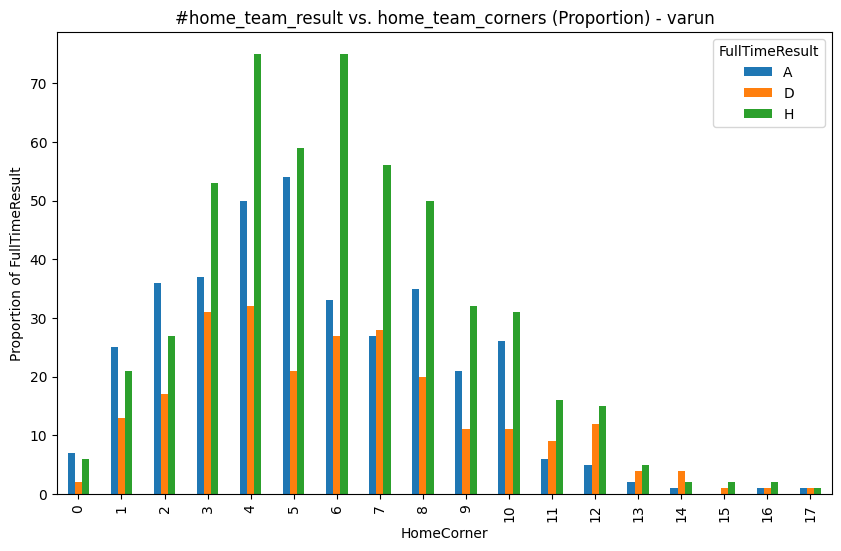

In [33]:
# Group by HomeCorner and count each FullTimeResult value
pivot = combined_df.groupby("HomeCorners")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Display the resulting proportions
print(pivot)

# Optional: visualize the proportions with a stacked bar chart
pivot.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. home_team_corners (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()


In [34]:
combined_df["AwayFouls"].nunique()

23

FullTimeResult         A         D         H
AwayFouls                                   
1               1.000000  0.000000  0.000000
2               1.000000  0.000000  0.000000
3               0.692308  0.000000  0.307692
4               0.363636  0.227273  0.409091
5               0.312500  0.156250  0.531250
6               0.409836  0.147541  0.442623
7               0.392405  0.164557  0.443038
8               0.329545  0.193182  0.477273
9               0.305085  0.186441  0.508475
10              0.291339  0.204724  0.503937
11              0.380952  0.198413  0.420635
12              0.262295  0.196721  0.540984
13              0.358696  0.260870  0.380435
14              0.225000  0.362500  0.412500
15              0.210526  0.280702  0.508772
16              0.314286  0.285714  0.400000
17              0.270270  0.162162  0.567568
18              0.277778  0.277778  0.444444
19              0.357143  0.285714  0.357143
20              0.166667  0.500000  0.333333
21        

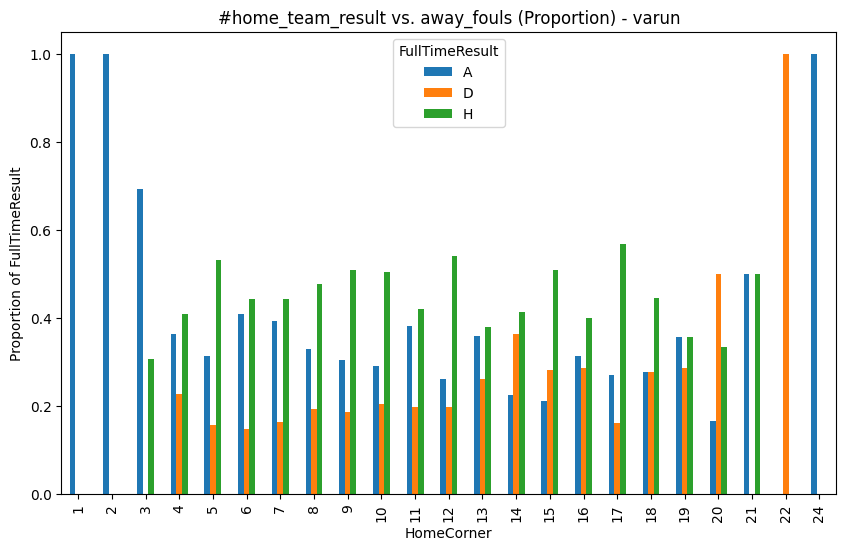

In [35]:
# Group by HomeCorner and count each FullTimeResult value
pivot = combined_df.groupby("AwayFouls")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions by dividing each row by its sum
prop = pivot.div(pivot.sum(axis=1), axis=0)

# Display the resulting proportions
print(prop)

# Optional: visualize the proportions with a stacked bar chart
prop.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. away_fouls (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()


FullTimeResult         A         D         H
AwayRedCards                                
0               0.329556  0.212465  0.457979
1               0.227848  0.253165  0.518987
2               0.000000  0.000000  1.000000


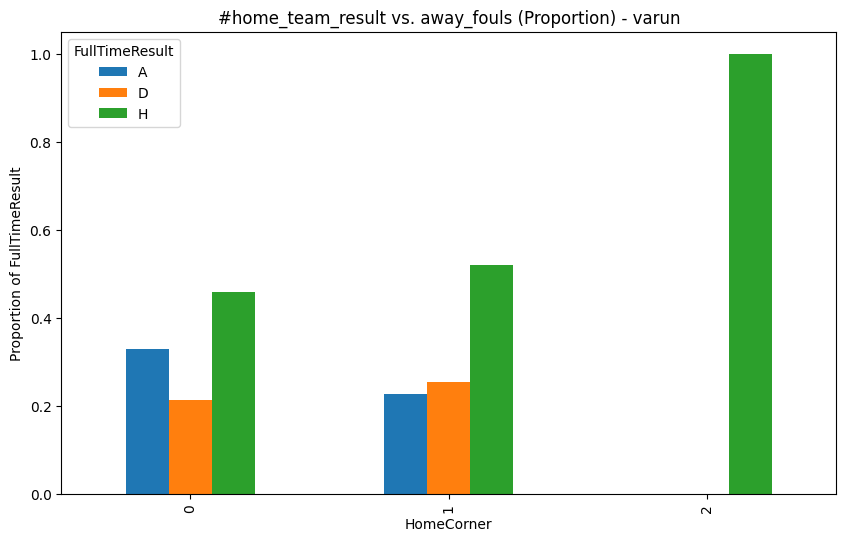

In [36]:
# Group by HomeCorner and count each FullTimeResult value
pivot = combined_df.groupby("AwayRedCards")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions by dividing each row by its sum
prop = pivot.div(pivot.sum(axis=1), axis=0)

# Display the resulting proportions
print(prop)

# Optional: visualize the proportions with a stacked bar chart
prop.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. away_fouls (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()


In [37]:
combined_df

,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,Referee,...,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Season,KickoffTime
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,2,5,11,8,2,1,0,0,2018,NaN
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,7,4,11,9,1,1,0,0,2018,NaN
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,5,5,9,11,1,2,0,0,2018,NaN
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,2,5,9,8,2,1,0,0,2018,NaN
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,3,5,11,12,2,2,0,0,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/2024,Crystal Palace,Aston Villa,5,0,H,2,0,H,D Bond,...,2,4,10,8,1,4,0,0,2023,16:00
376,19/05/2024,Liverpool,Wolves,2,0,H,2,0,H,C Kavanagh,...,10,2,14,11,1,1,0,1,2023,16:00
377,19/05/2024,Luton,Fulham,2,4,A,1,2,A,M Donohue,...,4,4,15,20,5,4,0,0,2023,16:00
378,19/05/2024,Man City,West Ham,3,1,H,2,1,H,J Brooks,...,11,2,3,12,0,1,0,0,2023,16:00


FullTimeResult         A         D         H
Referee                                     
A Madley        0.361111  0.222222  0.416667
A Marriner      0.313725  0.294118  0.392157
A Taylor        0.252747  0.197802  0.549451
C Kavanagh      0.257143  0.228571  0.514286
C Pawson        0.441176  0.191176  0.367647
D Bond          0.200000  0.200000  0.600000
D Coote         0.232558  0.186047  0.581395
D England       0.153846  0.307692  0.538462
G Scott         0.219512  0.170732  0.609756
J Brooks        0.363636  0.227273  0.409091
J Gillett       0.476190  0.095238  0.428571
J Moss          0.326923  0.153846  0.519231
J Smith         0.000000  0.250000  0.750000
K Friend        0.288462  0.230769  0.480769
L Mason         0.257143  0.285714  0.457143
L Probert       0.222222  0.333333  0.444444
L Smith         0.500000  0.000000  0.500000
M Atkinson      0.360656  0.245902  0.393443
M Dean          0.267857  0.232143  0.500000
M Donohue       1.000000  0.000000  0.000000
M Oliver  

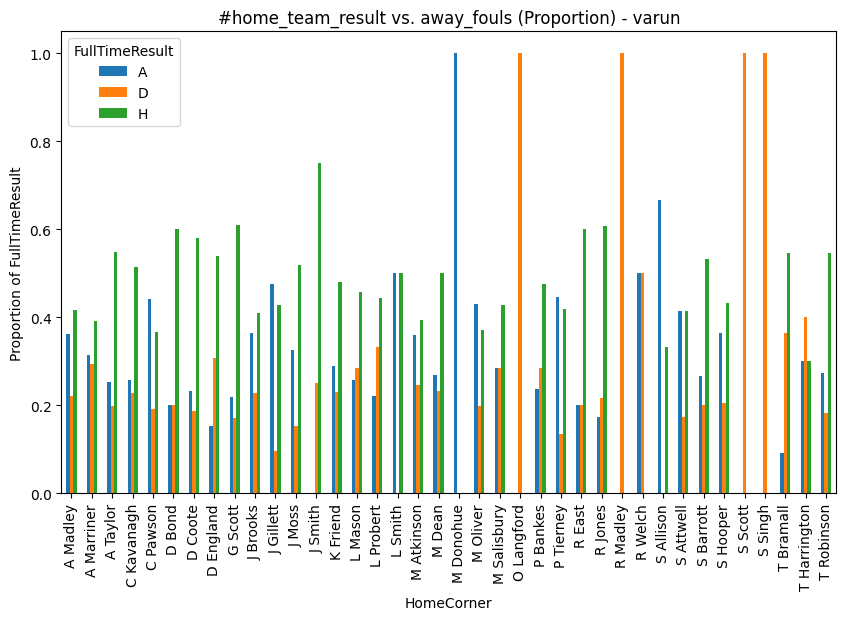

In [38]:
# Group by HomeCorner and count each FullTimeResult value
combined_df["Referee"] = combined_df["Referee"].apply(lambda x: x.strip())
pivot = combined_df.groupby("Referee")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions by dividing each row by its sum
prop = pivot.div(pivot.sum(axis=1), axis=0)

# Display the resulting proportions
print(prop)

# Optional: visualize the proportions with a stacked bar chart
prop.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. away_fouls (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()


In [39]:
grouped_df = combined_df.groupby(["Referee", "FullTimeResult"]).count().reset_index()
grouped_df[grouped_df["Referee"] == "J Gillett "]

/var/folders/pn/2dg49b3d1bv5nvhgytbsqc7h0000gn/T/ipykernel_15989/1183788282.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = combined_df.groupby(["Referee", "FullTimeResult"]).count().reset_index()


,Referee,FullTimeResult,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Season,KickoffTime


In [40]:
26/74

0.35135135135135137

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

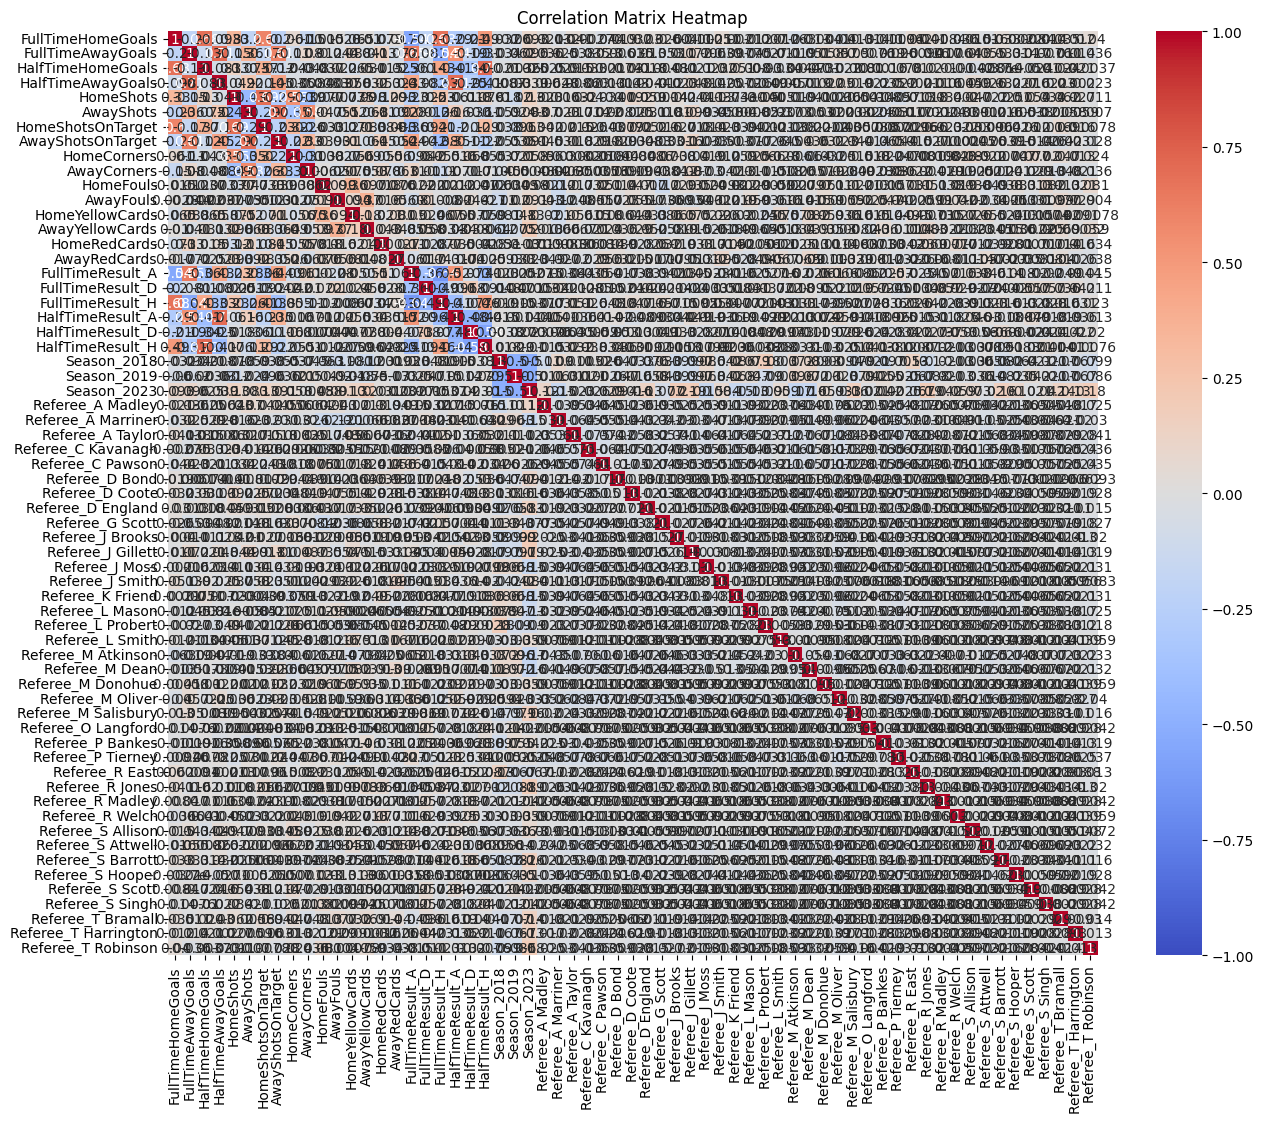

In [42]:
df = pd.get_dummies(combined_df, columns=['FullTimeResult', 'HalfTimeResult', 'Season', "Referee"], drop_first=False)
df = df.drop(columns={"MatchDate", 'KickoffTime','HomeTeam', 'AwayTeam'})

corr = df.corr()

plt.figure(figsize=(15, 12))

# Create a heatmap with annotations and a diverging color palette
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title (optional)
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

In [67]:
df = pd.get_dummies(combined_df, columns=['FullTimeResult', 'HalfTimeResult', 'Season', "Referee"], drop_first=False)
df = df.drop(columns={"MatchDate", 'KickoffTime','HomeTeam', 'AwayTeam'})

PCA Loadings:
                           PC1       PC2       PC3       PC4       PC5  \
FullTimeHomeGoals    -0.299995  0.186113  0.263303  0.113874  0.042518   
FullTimeAwayGoals     0.320811  0.249308  0.029901  0.231497 -0.001899   
HalfTimeHomeGoals    -0.256455  0.116264  0.424100  0.071907 -0.010606   
HalfTimeAwayGoals     0.278861  0.262387 -0.034167  0.338662 -0.075255   
HomeShots            -0.281723  0.224732 -0.224766  0.220842  0.013096   
AwayShots             0.310897  0.050423  0.277519 -0.135094  0.123530   
HomeShotsOnTarget    -0.311653  0.244466  0.005226  0.174615  0.036933   
AwayShotsOnTarget     0.341885  0.163437  0.176872  0.039012  0.071248   
HomeCorners          -0.177442  0.128664 -0.316287  0.158927 -0.044156   
AwayCorners           0.200268 -0.082856  0.282894 -0.207316  0.082560   
HomeFouls             0.033803  0.100841 -0.002335 -0.197760 -0.178810   
AwayFouls            -0.021707  0.111770 -0.073832 -0.181553 -0.274100   
HomeYellowCards       0.

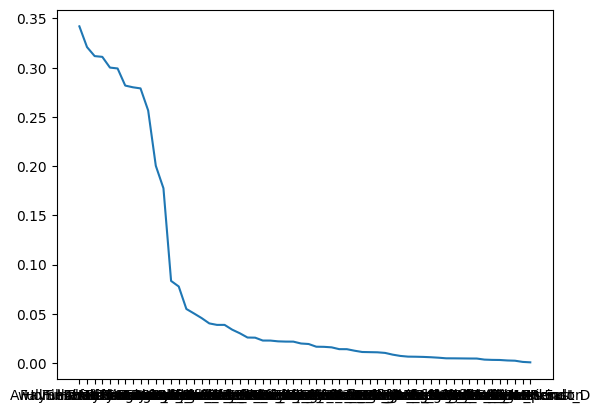

In [76]:
X_scaled = StandardScaler().fit_transform(df.drop(columns={"FullTimeResult_A", 'FullTimeResult_D', 'FullTimeResult_H'}))
pca = PCA()  # Retain 2 principal components
    
# Fit PCA to the scaled data
pca.fit(X_scaled)

# Create a DataFrame for the loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=df.columns.drop({"FullTimeResult_A", 'FullTimeResult_D', 'FullTimeResult_H'}))

print("PCA Loadings:")
print(loadings)

# To see the most influential features for the first principal component (PC1):
pc1_loadings = loadings['PC1'].abs().sort_values(ascending=False)
pc2_loadings = loadings['PC2'].abs().sort_values(ascending=False)
pc3_loadings = loadings['PC3'].abs().sort_values(ascending=False)
pc4_loadings = loadings['PC4'].abs().sort_values(ascending=False)
pc5_loadings = loadings['PC5'].abs().sort_values(ascending=False)

print("\nMost influential features for PC1:")
print(pc1_loadings)

plt.plot(pc1_loadings)

# Transform the data to the new principal component space
X_pca = pca.transform(X_scaled)

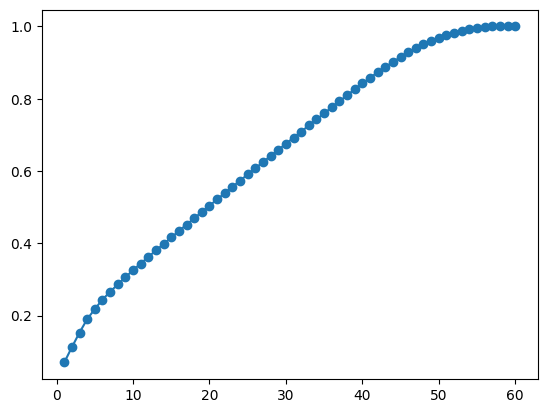

In [78]:
plt.plot(range(1, 61), pca.explained_variance_ratio_.cumsum(), marker='o')

PCA Loadings:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
FullTimeHomeGoals -0.289765  0.325006 -0.349601  0.273927 -0.026996 -0.037888   
FullTimeAwayGoals  0.303275  0.458723  0.182645 -0.137664  0.026611 -0.087912   
HalfTimeHomeGoals -0.194810  0.278315 -0.415958  0.322805  0.082102 -0.064713   
HalfTimeAwayGoals  0.221116  0.482338  0.215077 -0.150776  0.030169 -0.160044   
HomeShots         -0.369620  0.278356  0.176411 -0.120320 -0.071786  0.090532   
AwayShots          0.390013  0.141223 -0.191662  0.157155 -0.036792  0.100889   
HomeShotsOnTarget -0.356598  0.358449 -0.069275  0.086304 -0.082930  0.114614   
AwayShotsOnTarget  0.377947  0.343048 -0.004769  0.025483 -0.007884  0.084195   
HomeCorners       -0.259442  0.129934  0.319114 -0.226610 -0.041251  0.130170   
AwayCorners        0.284329 -0.084143 -0.288955  0.197663 -0.018861  0.171377   
HomeFouls          0.044647 -0.038228  0.244329  0.404902 -0.451268 -0.045648   
AwayFouls     

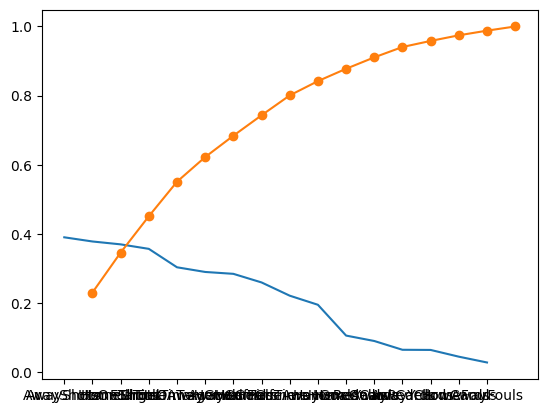

In [84]:
df = combined_df.drop(columns={"MatchDate", 'KickoffTime','HomeTeam', 'AwayTeam', 'FullTimeResult', 'HalfTimeResult', 'Season', "Referee"})

X_scaled = StandardScaler().fit_transform(df)
pca = PCA()  # Retain 2 principal components
    
# Fit PCA to the scaled data
pca.fit(X_scaled)

# Create a DataFrame for the loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=df.columns)

print("PCA Loadings:")
print(loadings)

# To see the most influential features for the first principal component (PC1):
pc1_loadings = loadings['PC1'].abs().sort_values(ascending=False)
pc2_loadings = loadings['PC2'].abs().sort_values(ascending=False)
pc3_loadings = loadings['PC3'].abs().sort_values(ascending=False)
pc4_loadings = loadings['PC4'].abs().sort_values(ascending=False)
pc5_loadings = loadings['PC5'].abs().sort_values(ascending=False)

print("\nMost influential features for PC1:")
print(pc1_loadings)

plt.plot(pc1_loadings)

# Transform the data to the new principal component space
X_pca = pca.transform(X_scaled)

plt.plot(range(1, 17), pca.explained_variance_ratio_.cumsum(), marker='o')

In [92]:
pca.explained_variance_ratio_.cumsum()

array([0.23029104, 0.34579948, 0.45088542, 0.55084554, 0.62216184,
       0.68392349, 0.74304113, 0.8005994 , 0.84192681, 0.87763272,
       0.91067677, 0.94061575, 0.95819597, 0.97446056, 0.98791862,
       1.        ])

In [191]:
import numpy as np
import pandas as pd

# For splitting data and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statsmodels for logistic regression (for the summary)
import statsmodels.api as sm

# Performance metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve, 
    classification_report
)

import matplotlib.pyplot as plt

df_logreg = df_new.copy()
#df_logreg["FTGD"] = df_logreg["FullTimeAwayGoals"]-df_logreg["FullTimeHomeGoals"]
df_logreg["FTSD"] = df_logreg["AwayShotsOnTarget"]-df_logreg["HomeShotsOnTarget"]
df_logreg["FTCD"] = df_logreg["AwayCorners"]-df_logreg["HomeCorners"]
df_logreg["FTFD"] = df_logreg["HomeFouls"]-df_logreg["AwayFouls"]

df_logreg_final = df_logreg[["FullTimeResult", "FTSD", "FTCD", "FTFD"]]
df_logreg_final

X = df_logreg_final.drop("FullTimeResult", axis=1)
y = df_logreg_final["FullTimeResult"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% test set
    random_state=42,     # for reproducibility
    stratify=y           # optional, but often good for classification
)

scaler = StandardScaler()

# Fit scaler on the training data, then transform
X_train_scaled = scaler.fit_transform(X_train)

# Use the *same* scaler (already fit) to transform test data
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()

# Fit scaler on the training data, then transform
X_train_scaled = scaler.fit_transform(X_train)

# Use the *same* scaler (already fit) to transform test data
X_test_scaled = scaler.transform(X_test)

X_train_scaled_const = sm.add_constant(X_train_scaled)  # add constant
X_test_scaled_const  = sm.add_constant(X_test_scaled)

logit_model = sm.Logit(y_train, X_train_scaled_const).fit()

print(logit_model.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore


Optimization terminated successfully.
         Current function value: 0.528562
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         FullTimeResult   No. Observations:                  912
Model:                          Logit   Df Residuals:                      908
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.2344
Time:                        18:55:33   Log-Likelihood:                -482.05
converged:                       True   LL-Null:                       -629.61
Covariance Type:            nonrobust   LLR p-value:                 1.127e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2168      0.079     -2.742      0.006      -0.372      -0.062
x1            -1.6364      0.

In [192]:
y_score=logit_model.predict(X_test_scaled_const)
y_pred = (y_score >= 0.5).astype(int)

confusion_matrix(y_test, y_pred)

array([[99, 23],
       [33, 73]])

                         VIF
FullTimeHomeGoals   6.503907
FullTimeAwayGoals   5.752033
HalfTimeHomeGoals   3.221709
HalfTimeAwayGoals   3.271638
HomeShots          16.281366
AwayShots          15.741635
HomeShotsOnTarget  11.742069
AwayShotsOnTarget  10.909976
HomeCorners         6.463272
AwayCorners         5.818512
HomeFouls           9.800523
AwayFouls           9.557956
HomeYellowCards     3.239058
AwayYellowCards     3.840977
HomeRedCards        1.107481
AwayRedCards        1.112618


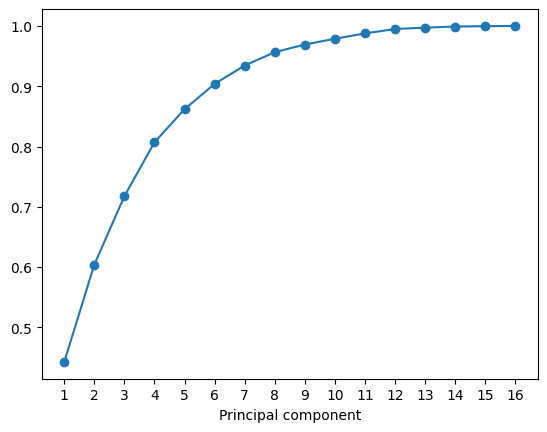

[0.44269988 0.60408768 0.71760022 0.80691727 0.86190244 0.90379757
 0.93424635 0.95636692 0.9691284  0.97868515 0.98757394 0.99481694
 0.99719161 0.99901695 0.99956216 1.        ]
    VIF
Z1  1.0
Z2  1.0
Z3  1.0
Z4  1.0
Z5  1.0
Z6  1.0
Optimization terminated successfully.
         Current function value: 0.540523
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    FTR   No. Observations:                 1140
Model:                          Logit   Df Residuals:                     1135
Method:                           MLE   Df Model:                            4
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.2171
Time:                        16:03:13   Log-Likelihood:                -616.20
converged:                       True   LL-Null:                       -787.09
Covariance Type:                  hc0   LLR p-value:                 1.039e-72
                 coef    std e

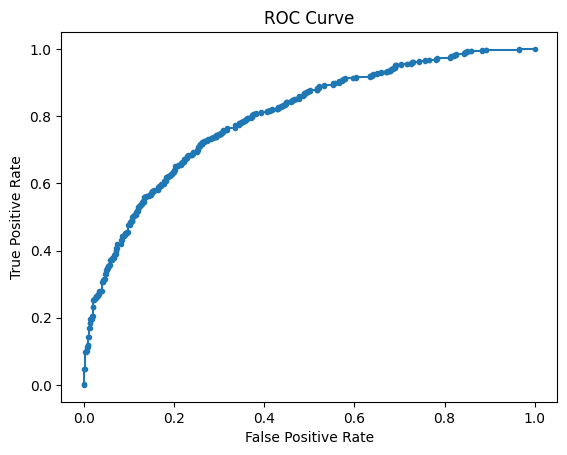

In [156]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore

df_new = combined_df.drop(columns={"MatchDate", 'KickoffTime','HomeTeam', 'AwayTeam', 'HalfTimeResult', 'Season', "Referee"})
df_new["FullTimeResult"] = (df_new["FullTimeResult"] == "H").astype(int)

X_new = df_new.drop(columns={"FullTimeResult"})
vif = pd.DataFrame([variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])], index=X_new.columns, columns=['VIF'])
print(vif)

pca = PCA()
pca.fit(X_new)

Z = pca.transform(X_new)

# scree plot
plt.plot(range(1, X_new.shape[1] + 1), (pca.explained_variance_ratio_.cumsum()), marker='o')
plt.xticks(np.arange(1, X_new.shape[1] + 1, 1))
plt.xlabel('Principal component')
plt.show()

print(pca.explained_variance_ratio_.cumsum())

q = 6
factor_loadings = pd.DataFrame(-pca.components_[0:q,:].round(2), columns=X_new.columns)
factor_loadings

pca.transform(X_new)[:, 0:q]

pca_X = -pca.transform(X_new)[:,:q]

pca_df = pd.DataFrame(pca_X, columns=['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6'])
pca_df["FTR"] = df_new["FullTimeResult"].reset_index(drop=True)

#include new variable = FTAwayG-FTHomeG
#run pca on only the numerical covariates

Z = pca_df.drop('FTR', axis=1)
vif = pd.DataFrame([variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])], index=Z.columns, columns=['VIF'])
print(vif)

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf

pca_fit = smf.logit('FTR ~ Z1 + Z2 + Z5 + Z6', pca_df).fit(cov_type="hc0")

print(pca_fit.summary())

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# 1. Get predicted probabilities (scores) from your logistic model
y_true = pca_df["FTR"]  # Ground truth
y_score = pca_fit.predict(pca_df)  # Predicted probabilities

# 2. Apply a 0.5 threshold to get class predictions
y_pred = (y_score >= 0.5).astype(int)

# 3. Evaluate metrics
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_score)

print("Confusion Matrix:\n", cm)
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"AUC:       {auc:.3f}")

# 4. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

PCA Loadings:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
FullTimeHomeGoals  0.062809  0.035550  0.006820 -0.006553 -0.208794  0.010666   
FullTimeAwayGoals -0.049347  0.075716  0.007567 -0.000083  0.091006 -0.221236   
HalfTimeHomeGoals  0.017487  0.011481  0.002762  0.008779 -0.113934  0.008075   
HalfTimeAwayGoals -0.016425  0.037216  0.009246  0.005761  0.050319 -0.126101   
HomeShots          0.708558  0.545958  0.083243  0.000906 -0.132093 -0.016425   
AwayShots         -0.529119  0.704716  0.108829  0.041055  0.057000 -0.076940   
HomeShotsOnTarget  0.241204  0.219731  0.036492 -0.026229 -0.352243  0.017004   
AwayShotsOnTarget -0.183411  0.277333  0.055051  0.014454  0.162326 -0.376616   
HomeCorners        0.257586  0.110319  0.021942 -0.026752  0.855921  0.281071   
AwayCorners       -0.223639  0.187851 -0.006369  0.042075 -0.168142  0.840039   
HomeFouls         -0.041465 -0.052736  0.509950 -0.842674 -0.020448  0.031268   
AwayFouls     

/Users/varunpabreja/miniforge3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


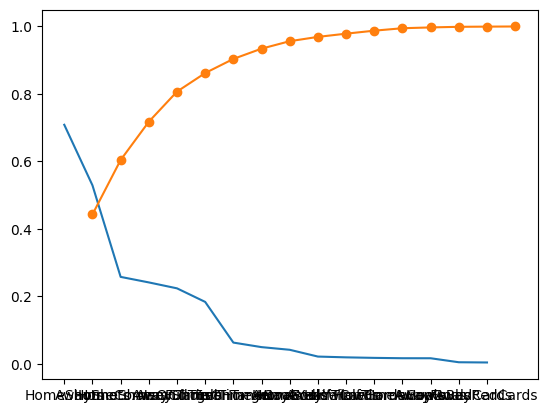

In [171]:
# Create a DataFrame for the loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=df_new.columns.drop({"FullTimeResult", "FTGD"}))

print("PCA Loadings:")
print(loadings)

# To see the most influential features for the first principal component (PC1):
pc1_loadings = loadings['PC1'].abs().sort_values(ascending=False)
pc2_loadings = loadings['PC2'].abs().sort_values(ascending=False)
pc3_loadings = loadings['PC3'].abs().sort_values(ascending=False)
pc4_loadings = loadings['PC4'].abs().sort_values(ascending=False)
pc5_loadings = loadings['PC5'].abs().sort_values(ascending=False)
pc6_loadings = loadings['PC6'].abs().sort_values(ascending=False)

print("\nMost influential features for PC1:")
print(pc1_loadings)

plt.plot(pc1_loadings)

# Transform the data to the new principal component space
X_pca = pca.transform(X_scaled)

plt.plot(range(1, 17), pca.explained_variance_ratio_.cumsum(), marker='o')

In [172]:
print("\nMost influential features for PC1:")
print(pc1_loadings)


Most influential features for PC1:
HomeShots            0.708558
AwayShots            0.529119
HomeCorners          0.257586
HomeShotsOnTarget    0.241204
AwayCorners          0.223639
AwayShotsOnTarget    0.183411
FullTimeHomeGoals    0.062809
FullTimeAwayGoals    0.049347
HomeFouls            0.041465
HomeYellowCards      0.021354
AwayYellowCards      0.019028
HalfTimeHomeGoals    0.017487
HalfTimeAwayGoals    0.016425
AwayFouls            0.016360
HomeRedCards         0.004498
AwayRedCards         0.003831
Name: PC1, dtype: float64


In [173]:
print("\nMost influential features for PC1:")
print(pc2_loadings)


Most influential features for PC1:
AwayShots            0.704716
HomeShots            0.545958
AwayShotsOnTarget    0.277333
HomeShotsOnTarget    0.219731
AwayCorners          0.187851
AwayFouls            0.145498
HomeCorners          0.110319
FullTimeAwayGoals    0.075716
HomeFouls            0.052736
HalfTimeAwayGoals    0.037216
FullTimeHomeGoals    0.035550
HalfTimeHomeGoals    0.011481
HomeYellowCards      0.009622
AwayYellowCards      0.009610
AwayRedCards         0.001097
HomeRedCards         0.000965
Name: PC2, dtype: float64


In [174]:
print("\nMost influential features for PC1:")
print(pc3_loadings)


Most influential features for PC1:
AwayFouls            0.828915
HomeFouls            0.509950
AwayYellowCards      0.136689
AwayShots            0.108829
HomeYellowCards      0.101359
HomeShots            0.083243
AwayShotsOnTarget    0.055051
HomeShotsOnTarget    0.036492
HomeCorners          0.021942
HalfTimeAwayGoals    0.009246
FullTimeAwayGoals    0.007567
FullTimeHomeGoals    0.006820
AwayCorners          0.006369
AwayRedCards         0.006037
HalfTimeHomeGoals    0.002762
HomeRedCards         0.001589
Name: PC3, dtype: float64


In [175]:
print("\nMost influential features for PC1:")
print(pc4_loadings)


Most influential features for PC1:
HomeFouls            0.842674
AwayFouls            0.519703
HomeYellowCards      0.110611
AwayYellowCards      0.048330
AwayCorners          0.042075
AwayShots            0.041055
HomeCorners          0.026752
HomeShotsOnTarget    0.026229
AwayShotsOnTarget    0.014454
HalfTimeHomeGoals    0.008779
FullTimeHomeGoals    0.006553
HalfTimeAwayGoals    0.005761
AwayRedCards         0.003891
HomeShots            0.000906
HomeRedCards         0.000727
FullTimeAwayGoals    0.000083
Name: PC4, dtype: float64


In [176]:
print("\nMost influential features for PC1:")
print(pc5_loadings)


Most influential features for PC1:
HomeCorners          0.855921
HomeShotsOnTarget    0.352243
FullTimeHomeGoals    0.208794
AwayCorners          0.168142
AwayShotsOnTarget    0.162326
HomeShots            0.132093
HalfTimeHomeGoals    0.113934
FullTimeAwayGoals    0.091006
AwayShots            0.057000
HalfTimeAwayGoals    0.050319
HomeFouls            0.020448
AwayYellowCards      0.010996
HomeYellowCards      0.007061
HomeRedCards         0.004243
AwayFouls            0.002833
AwayRedCards         0.000958
Name: PC5, dtype: float64


In [177]:
print("\nMost influential features for PC1:")
print(pc6_loadings)


Most influential features for PC1:
AwayCorners          0.840039
AwayShotsOnTarget    0.376616
HomeCorners          0.281071
FullTimeAwayGoals    0.221236
HalfTimeAwayGoals    0.126101
AwayShots            0.076940
HomeFouls            0.031268
AwayYellowCards      0.028107
HomeShotsOnTarget    0.017004
HomeShots            0.016425
AwayFouls            0.014064
FullTimeHomeGoals    0.010666
HalfTimeHomeGoals    0.008075
HomeRedCards         0.003517
HomeYellowCards      0.003323
AwayRedCards         0.000946
Name: PC6, dtype: float64


In [168]:
df_new.columns

Index(['FullTimeHomeGoals', 'FullTimeAwayGoals', 'FullTimeResult',
       'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards', 'FTGD'],
      dtype='object')

                         VIF
FullTimeHomeGoals   6.503907
FullTimeAwayGoals   5.752033
HalfTimeHomeGoals   3.221709
HalfTimeAwayGoals   3.271638
HomeShots          16.281366
AwayShots          15.741635
HomeShotsOnTarget  11.742069
AwayShotsOnTarget  10.909976
HomeCorners         6.463272
AwayCorners         5.818512
HomeFouls           9.800523
AwayFouls           9.557956
HomeYellowCards     3.239058
AwayYellowCards     3.840977
HomeRedCards        1.107481
AwayRedCards        1.112618


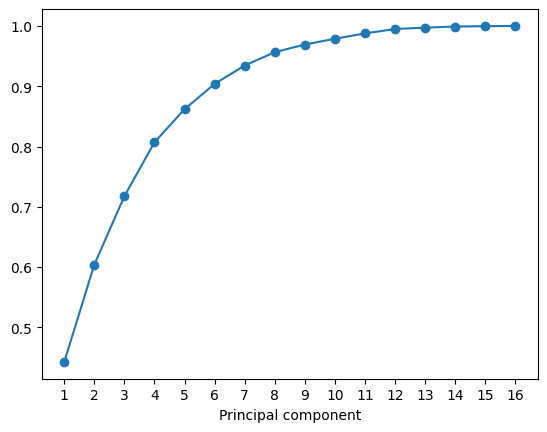

[0.44269988 0.60408768 0.71760022 0.80691727 0.86190244 0.90379757
 0.93424635 0.95636692 0.9691284  0.97868515 0.98757394 0.99481694
 0.99719161 0.99901695 0.99956216 1.        ]
    VIF
Z1  1.0
Z2  1.0
Z3  1.0
Z4  1.0
Optimization terminated successfully.
         Current function value: 0.635147
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    FTR   No. Observations:                 1140
Model:                          Logit   Df Residuals:                     1135
Method:                           MLE   Df Model:                            4
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                 0.08007
Time:                        16:04:38   Log-Likelihood:                -724.07
converged:                       True   LL-Null:                       -787.09
Covariance Type:                  hc0   LLR p-value:                 2.729e-26
                 coef    std err          z   

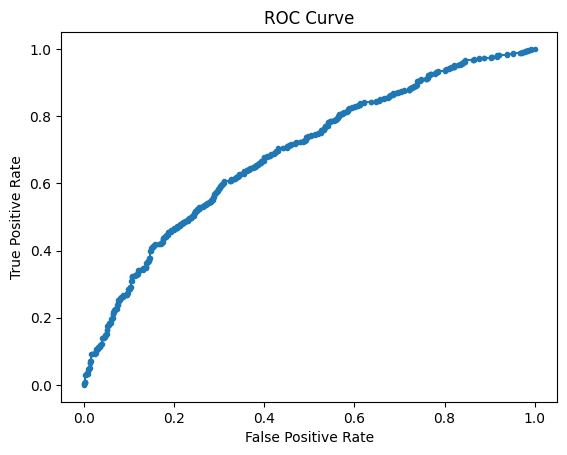

In [157]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore

df_new = combined_df.drop(columns={"MatchDate", 'KickoffTime','HomeTeam', 'AwayTeam', 'HalfTimeResult', 'Season', "Referee"})
df_new["FullTimeResult"] = (df_new["FullTimeResult"] == "H").astype(int)

X_new = df_new.drop(columns={"FullTimeResult"})
vif = pd.DataFrame([variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])], index=X_new.columns, columns=['VIF'])
print(vif)

pca = PCA()
pca.fit(X_new)

Z = pca.transform(X_new)

# scree plot
plt.plot(range(1, X_new.shape[1] + 1), (pca.explained_variance_ratio_.cumsum()), marker='o')
plt.xticks(np.arange(1, X_new.shape[1] + 1, 1))
plt.xlabel('Principal component')
plt.show()

print(pca.explained_variance_ratio_.cumsum())

q = 4
factor_loadings = pd.DataFrame(-pca.components_[0:q,:].round(2), columns=X_new.columns)
factor_loadings

pca.transform(X_new)[:, 0:q]

pca_X = -pca.transform(X_new)[:,:q]

pca_df = pd.DataFrame(pca_X, columns=['Z1', 'Z2', 'Z3', 'Z4'])
pca_df["FTR"] = df_new["FullTimeResult"].reset_index(drop=True)

#include new variable = FTAwayG-FTHomeG
#run pca on only the numerical covariates

Z = pca_df.drop('FTR', axis=1)
vif = pd.DataFrame([variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])], index=Z.columns, columns=['VIF'])
print(vif)

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf

pca_fit = smf.logit('FTR ~ Z1 + Z2 + Z3 + Z4', pca_df).fit(cov_type="hc0")

print(pca_fit.summary())

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# 1. Get predicted probabilities (scores) from your logistic model
y_true = pca_df["FTR"]  # Ground truth
y_score = pca_fit.predict(pca_df)  # Predicted probabilities

# 2. Apply a 0.5 threshold to get class predictions
y_pred = (y_score >= 0.5).astype(int)

# 3. Evaluate metrics
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_score)

print("Confusion Matrix:\n", cm)
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"AUC:       {auc:.3f}")

# 4. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

array([0.44269988, 0.60408768, 0.71760022, 0.80691727, 0.86190244,
       0.90379757, 0.93424635, 0.95636692, 0.9691284 , 0.97868515,
       0.98757394, 0.99481694, 0.99719161, 0.99901695, 0.99956216,
       1.        ])

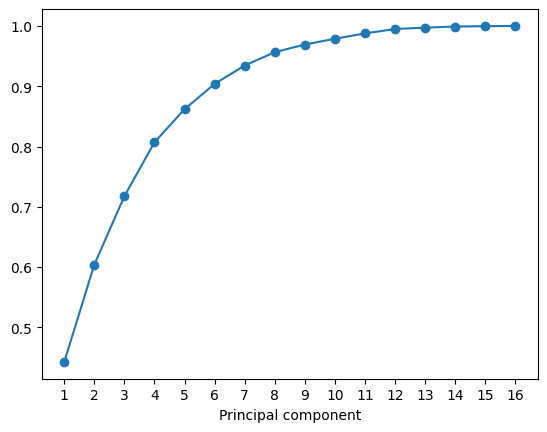

In [110]:
pca = PCA()
pca.fit(X_new)

Z = pca.transform(X_new)

# scree plot
plt.plot(range(1, X_new.shape[1] + 1), (pca.explained_variance_ratio_.cumsum()), marker='o')
plt.xticks(np.arange(1, X_new.shape[1] + 1, 1))
plt.xlabel('Principal component')

pca.explained_variance_ratio_.cumsum()

In [151]:
q = 6
factor_loadings = pd.DataFrame(-pca.components_[0:q,:].round(2), columns=X_new.columns)
factor_loadings

pca.transform(X_new)[:, 0:q]

pca_X = -pca.transform(X_new)[:,:q]

pca_df = pd.DataFrame(pca_X, columns=['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6'])
pca_df["FTR"] = df_new["FullTimeResult"].reset_index(drop=True)

In [152]:
#include new variable = FTAwayG-FTHomeG
#run pca on only the numerical covariates

Z = pca_df.drop('FTR', axis=1)
vif = pd.DataFrame([variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])], index=Z.columns, columns=['VIF'])
vif

,VIF
Z1,1.0
Z2,1.0
Z3,1.0
Z4,1.0
Z5,1.0
Z6,1.0


In [153]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf

pca_fit = smf.logit('FTR ~ Z1 + Z2 + Z5 + Z6', pca_df).fit(cov_type="hc0")

print(pca_fit.summary())

Optimization terminated successfully.
         Current function value: 0.540523
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    FTR   No. Observations:                 1140
Model:                          Logit   Df Residuals:                     1135
Method:                           MLE   Df Model:                            4
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.2171
Time:                        16:00:34   Log-Likelihood:                -616.20
converged:                       True   LL-Null:                       -787.09
Covariance Type:                  hc0   LLR p-value:                 1.039e-72
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2203      0.071     -3.116      0.002      -0.359      -0.082
Z1            -0.1215      0.

In [154]:
pca_df

,Z1,Z2,Z3,Z4,Z5,Z6,FTR
0,6.023190,2.227776,2.628248,1.895415,3.021808,0.704559,1
1,-0.064852,3.296644,2.023836,1.551299,-0.843176,-1.353691,1
2,-0.343289,-0.877501,0.528364,-1.393180,0.028885,2.000886,0
3,8.838043,4.169596,3.979868,0.065051,0.141341,1.543345,0
4,3.072701,-2.035085,-1.574723,-0.430791,1.005138,1.536719,0
...,...,...,...,...,...,...,...
1135,-3.271546,1.956269,2.769537,1.156537,6.229641,0.159590,1
1136,-23.439841,-7.846475,-3.071083,3.657399,3.144681,-0.132020,1
1137,2.090353,-2.212842,-11.129635,-0.830988,1.153457,2.908948,0
1138,-18.746127,-2.742166,2.674073,-6.208297,0.598329,-0.293222,1


Confusion Matrix:
 [[460 152]
 [162 366]]
Accuracy:  0.725
Precision: 0.707
Recall:    0.693
F1-score:  0.700
AUC:       0.798


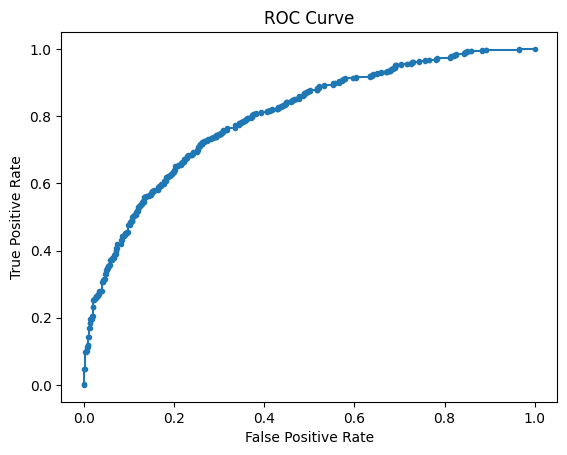

In [150]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# 1. Get predicted probabilities (scores) from your logistic model
y_true = pca_df["FTR"]  # Ground truth
y_score = pca_fit.predict(pca_df)  # Predicted probabilities

# 2. Apply a 0.5 threshold to get class predictions
y_pred = (y_score >= 0.5).astype(int)

# 3. Evaluate metrics
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_score)

print("Confusion Matrix:\n", cm)
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"AUC:       {auc:.3f}")

# 4. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [142]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf

pca_fit = smf.logit('FTR ~ Z1 + Z2 + Z3 + Z4 + Z5 + Z6', pca_df).fit(cov_type="hc0")

print(pca_fit.summary())

Optimization terminated successfully.
         Current function value: 0.540075
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    FTR   No. Observations:                 1140
Model:                          Logit   Df Residuals:                     1133
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.2178
Time:                        15:59:25   Log-Likelihood:                -615.69
converged:                       True   LL-Null:                       -787.09
Covariance Type:                  hc0   LLR p-value:                 5.395e-71
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2199      0.071     -3.113      0.002      -0.358      -0.081
Z1            -0.1212      0.

Confusion Matrix:
 [[460 152]
 [162 366]]
Accuracy:  0.725
Precision: 0.707
Recall:    0.693
F1-score:  0.700
AUC:       0.798


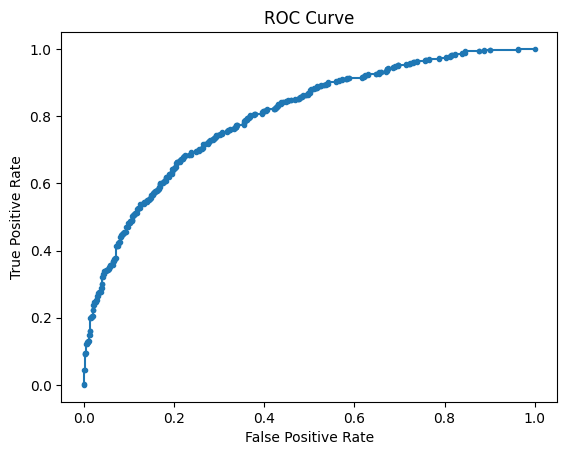

In [143]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# 1. Get predicted probabilities (scores) from your logistic model
y_true = pca_df["FTR"]  # Ground truth
y_score = pca_fit.predict(pca_df)  # Predicted probabilities

# 2. Apply a 0.5 threshold to get class predictions
y_pred = (y_score >= 0.5).astype(int)

# 3. Evaluate metrics
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_score)

print("Confusion Matrix:\n", cm)
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"AUC:       {auc:.3f}")

# 4. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [145]:
pca_df

,Z1,Z2,Z3,Z4,Z5,Z6,FTR
0,6.023190,2.227776,2.628248,1.895415,3.021808,0.704559,1
1,-0.064852,3.296644,2.023836,1.551299,-0.843176,-1.353691,1
2,-0.343289,-0.877501,0.528364,-1.393180,0.028885,2.000886,0
3,8.838043,4.169596,3.979868,0.065051,0.141341,1.543345,0
4,3.072701,-2.035085,-1.574723,-0.430791,1.005138,1.536719,0
...,...,...,...,...,...,...,...
1135,-3.271546,1.956269,2.769537,1.156537,6.229641,0.159590,1
1136,-23.439841,-7.846475,-3.071083,3.657399,3.144681,-0.132020,1
1137,2.090353,-2.212842,-11.129635,-0.830988,1.153457,2.908948,0
1138,-18.746127,-2.742166,2.674073,-6.208297,0.598329,-0.293222,1


In [85]:
print("\nMost influential features for PC1:")
print(pc1_loadings[:5])


Most influential features for PC1:
AwayShots            0.390013
AwayShotsOnTarget    0.377947
HomeShots            0.369620
HomeShotsOnTarget    0.356598
FullTimeAwayGoals    0.303275
Name: PC1, dtype: float64


In [86]:
print("\nMost influential features for PC2:")
print(pc2_loadings[:5])


Most influential features for PC2:
HalfTimeAwayGoals    0.482338
FullTimeAwayGoals    0.458723
HomeShotsOnTarget    0.358449
AwayShotsOnTarget    0.343048
FullTimeHomeGoals    0.325006
Name: PC2, dtype: float64


In [87]:
print("\nMost influential features for PC3:")
print(pc3_loadings[:5])


Most influential features for PC3:
HalfTimeHomeGoals    0.415958
FullTimeHomeGoals    0.349601
AwayYellowCards      0.332428
HomeCorners          0.319114
AwayCorners          0.288955
Name: PC3, dtype: float64


In [88]:
print("\nMost influential features for PC4:")
print(pc4_loadings[:5])


Most influential features for PC4:
HomeYellowCards      0.418399
HomeFouls            0.404902
AwayYellowCards      0.387960
AwayFouls            0.369944
HalfTimeHomeGoals    0.322805
Name: PC4, dtype: float64


In [89]:
print("\nMost influential features for PC5:")
print(pc5_loadings[:5])


Most influential features for PC5:
AwayFouls          0.511602
HomeFouls          0.451268
AwayYellowCards    0.431486
HomeYellowCards    0.411461
HomeRedCards       0.312282
Name: PC5, dtype: float64


In [90]:
X_scaled.shape

(1140, 16)

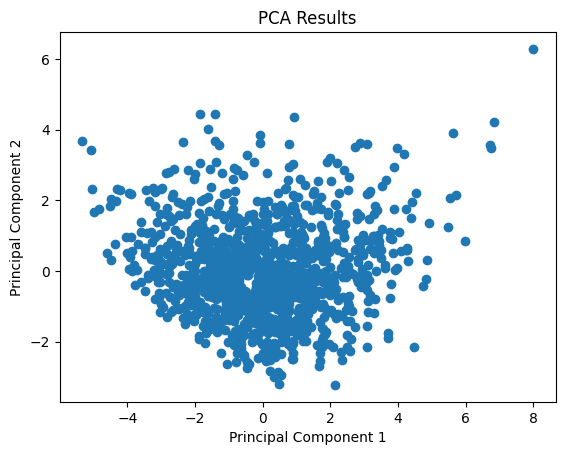

In [129]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

In [50]:
combined_df.shape

(1140, 24)

In [51]:
df.shape

(1140, 63)

In [52]:
pca.components_

array([[-2.99994788e-01,  3.20811175e-01, -2.56456162e-01,
         2.78862220e-01, -2.81722486e-01,  3.10896846e-01,
        -3.11652462e-01,  3.41883955e-01, -1.77442195e-01,
         2.00269317e-01,  3.38053153e-02, -2.17056040e-02,
         7.76855579e-02, -5.02678202e-02,  8.33322328e-02,
        -4.55703935e-02,  2.99109067e-01,  6.40793050e-04,
        -2.79993363e-01, -3.41574760e-03,  1.58724009e-02,
        -1.24566533e-02,  8.44484155e-03,  1.40379477e-02,
        -5.80628202e-03, -2.56983635e-02,  2.27364965e-02,
         6.15004928e-03, -4.01784366e-02, -1.11483434e-02,
        -1.92584125e-02, -1.09853253e-02,  5.48340935e-02,
        -4.72214279e-03, -3.86765457e-02,  2.54053450e-03,
        -3.02645201e-03, -1.97716427e-02, -6.32912865e-03,
         2.29246895e-03,  1.02082856e-02,  2.16640777e-02,
         3.86723359e-02,  5.33762324e-03, -7.15155166e-03,
        -2.58420456e-02,  2.27793142e-02, -1.07701396e-03,
        -2.19606655e-02, -4.69690190e-03,  4.61481254e-0

In [53]:
#show correlation between fouls and yellow,red cards (combine data and show this)
#away_fouls - by far the most conflictual feature => yellow/red cards ; corners cannot really be contested

combined_df

,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,Referee,...,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Season,KickoffTime
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,2,5,11,8,2,1,0,0,2018,NaN
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,7,4,11,9,1,1,0,0,2018,NaN
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,5,5,9,11,1,2,0,0,2018,NaN
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,2,5,9,8,2,1,0,0,2018,NaN
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,3,5,11,12,2,2,0,0,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/2024,Crystal Palace,Aston Villa,5,0,H,2,0,H,D Bond,...,2,4,10,8,1,4,0,0,2023,16:00
376,19/05/2024,Liverpool,Wolves,2,0,H,2,0,H,C Kavanagh,...,10,2,14,11,1,1,0,1,2023,16:00
377,19/05/2024,Luton,Fulham,2,4,A,1,2,A,M Donohue,...,4,4,15,20,5,4,0,0,2023,16:00
378,19/05/2024,Man City,West Ham,3,1,H,2,1,H,J Brooks,...,11,2,3,12,0,1,0,0,2023,16:00


In [54]:
#t-test
#compare H0 = prop. away_fouls = prop. home_fouls ; H1 = prop. away_fouls > prop. home_fouls

import scipy
from scipy import stats # type: ignore

t_statistic, p_value = stats.ttest_ind(df["HomeFouls"], df["AwayFouls"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

print(p_value < 0.01)

#do the 5 tests to look for validity

t-statistic: -2.8044408356050923
p-value: 0.005083138952339917
True


In [55]:
#K-S for home vs away fouls if 5 tests fail

from scipy.stats import ks_2samp

# Perform the 2-sample Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(df["HomeFouls"], df["AwayFouls"])

print("K-S Statistic:", statistic)
print("P-value:", p_value)

K-S Statistic: 0.04736842105263158
P-value: 0.15488969421401397


In [56]:
#K-S to compare the differences between refs

Optimization terminated successfully.
         Current function value: 0.690227
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         FullTimeResult   No. Observations:                 1140
Model:                          Logit   Df Residuals:                     1137
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:               0.0002934
Time:                        14:31:16   Log-Likelihood:                -786.86
converged:                       True   LL-Null:                       -787.09
Covariance Type:            nonrobust   LLR p-value:                    0.7938
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0321      0.184     -0.175      0.861      -0.393       0.328
HomeFouls_log    -0.

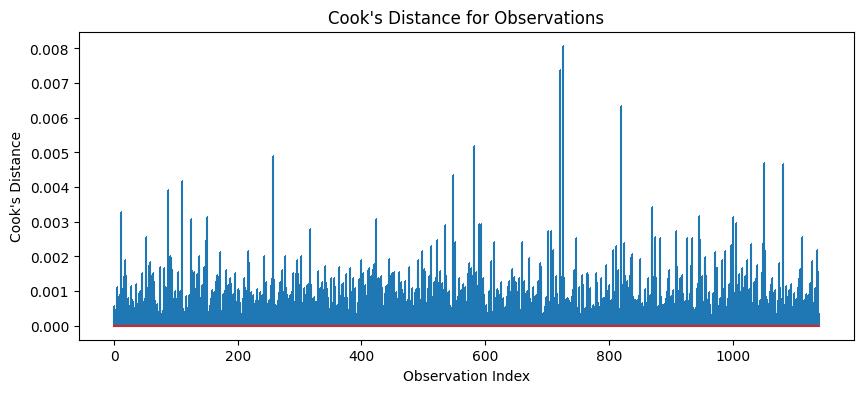

In [135]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# ----------------------------
# Prepare the Data
# ----------------------------
# Assume your DataFrame is named df and includes:
# "HomeFouls", "AwayFouls", "FullTimeResult" with values "H", "D", "A"

# For checking linearity in the logit, we convert the outcome to binary.
# Here we create a binary variable for Home wins (Outcome_H: 1 if "H", 0 otherwise)

# ----------------------------
# 1. Linearity in the Logit (Box-Tidwell Test)
# ----------------------------
# For each continuous predictor, we create an interaction with its natural log.
# (Add a small constant to avoid log(0) if needed.)
df_new['HomeFouls_log'] = df_new['HomeFouls'] * np.log(df_new['HomeFouls'] + 1e-5)
df_new['AwayFouls_log'] = df_new['AwayFouls'] * np.log(df_new['AwayFouls'] + 1e-5)

# Fit a logistic regression model including these interaction terms.
model = smf.logit("FullTimeResult ~ HomeFouls_log + AwayFouls_log", data=df_new).fit()
print(model.summary())

# Interpretation:
# - If the coefficients for HomeFouls_log or AwayFouls_log are statistically significant (p < 0.05),
#   then the assumption of linearity in the logit may be violated for that predictor.
#
# ----------------------------
# 2. Multicollinearity Check (Variance Inflation Factor - VIF)
# ----------------------------
# We check if HomeFouls and AwayFouls are highly correlated.
X = df_new[['HomeFouls', 'AwayFouls']]
X = sm.add_constant(X)  # Adds an intercept term
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# Interpretation:
# - VIF values above 5 (or sometimes 10) indicate a potential multicollinearity problem.

# ----------------------------
# 3. Influential Observations (Cook's Distance)
# ----------------------------
influence = model.get_influence()
cooks, _ = influence.cooks_distance

plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(cooks)), cooks, markerfmt=",")
plt.title("Cook's Distance for Observations")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# Interpretation:
# - Observations with a Cook's distance substantially larger than the others may be overly influential.

# ----------------------------
# Additional Considerations:
# ----------------------------
# - Independence: Ensure your data collection method provides independent observations.
# - Perfect Separation: If any predictor perfectly predicts Outcome_H, the model may not converge.
# - Sample Size: Logistic regression (via maximum likelihood) typically requires a reasonable sample size.
# - For Multinomial Logistic Regression: Check the IIA assumption if applicable.

# This code provides diagnostics to help you verify some of the conditions 
# necessary for logistic regression.


In [ ]:
#interaction terms - fouls*redcards/yellowcards ; look at the accuracy/precision when looking at the interaction terms
#what more can you include in the model to improve the performance - maybe referees? maybe league? maybe before/after VAR?
#
#do multiple logistic regressions ; feature engineering to show depth
